In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv('student_performance_data.csv')

# Encoding categorical variables
encoder = OneHotEncoder()
categorical_columns = ['Participation', 'ParentalInvolvement', 'ExtraCurricular']
encoded_data = pd.DataFrame(encoder.fit_transform(data[categorical_columns]).toarray())

# Get feature names after encoding
encoded_data.columns = encoder.get_feature_names(categorical_columns)

# Drop original categorical columns and concatenate encoded columns
data = data.drop(categorical_columns, axis=1)
data = pd.concat([data, encoded_data], axis=1)

# Convert 'Passed' to 0 (No) and 1 (Yes)
data['Passed'] = data['Passed'].map({'No': 0, 'Yes': 1})

# Now the rest of your code follows
# Define the features and the target
X = data.drop('Passed', axis=1)  # Features
y = data['Passed']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


feature_importances = pd.DataFrame(rf_classifier.feature_importances_, 
                                   index = X_train.columns, 
                                   columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

Accuracy: 0.74
              precision    recall  f1-score   support

           0       0.67      0.27      0.38        60
           1       0.75      0.94      0.84       140

    accuracy                           0.74       200
   macro avg       0.71      0.60      0.61       200
weighted avg       0.72      0.74      0.70       200

                            importance
Attendance                    0.254638
StudyHours                    0.237654
PreviousScores                0.188030
StudentID                     0.184132
ParentalInvolvement_High      0.018719
Participation_High            0.018677
ParentalInvolvement_Low       0.017212
ExtraCurricular_Yes           0.016802
ParentalInvolvement_Medium    0.016357
ExtraCurricular_No            0.016163
Participation_Low             0.016000
Participation_Medium          0.015615


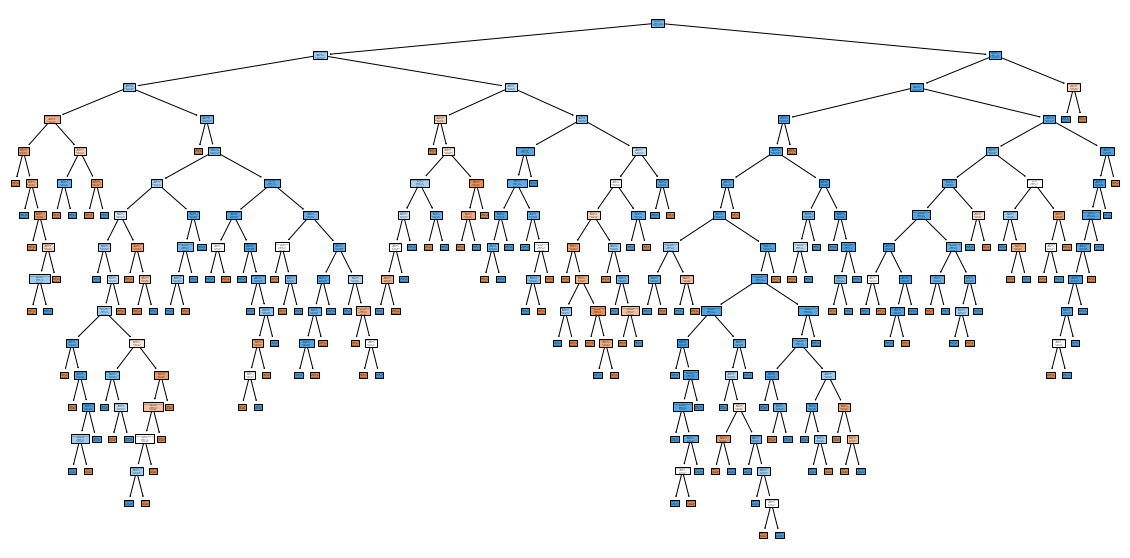

In [10]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming rf_classifier is your trained RandomForestClassifier for the student performance case study
chosen_tree = rf_classifier.estimators_[0]

# Plot the tree
plt.figure(figsize=(20,10))
plot_tree(chosen_tree, 
          feature_names=X_train.columns,  
          class_names=['Fail', 'Pass'],
          filled=True)
plt.show()
